<center><h1>Inteligencia Artificial</header1></center>

Presentado por: <br>
- Anthony Mauricio Goyes Díaz  <br>
- Bryan Alfredo Solórzano Montero <br>

Fecha: 13/08/2022

# Importación de librerias necesarias

In [2]:
'''Se importa la libreria os'''
import os
'''Se importa la libreria cv2'''
import cv2
'''Se importa la libreria numpy'''
import numpy as np
'''Se importa la libreria PIL'''
from PIL import Image
'''Se importa la libreria pylot'''
import matplotlib.pyplot as plt
'''Se importa la libreria model_selection'''
from sklearn.model_selection import train_test_split
'''Se establece el nivel de codificación'''
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
'''Se importa la libreria tf utils''' 
from tensorflow.keras.utils import to_categorical
'''Se importa la libreria tf'''
from tensorflow.keras import layers, models
'''Se importa la libreria tf callbacks'''
from tensorflow.keras.callbacks import EarlyStopping
'''Se importa la libreria tf'''
import tensorflow as tf
'''Se importa la libreria metrics'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
'''Se importa la libreria tf keras'''
from tensorflow import keras
'''Se importa la libreria keras.models'''
from keras.models import Sequential
'''Se importa la libreria kesa.layers'''
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
'''Se importa la libreria tf.keras.layers'''
from tensorflow.keras.layers import BatchNormalization
'''Se importa la libreria tf.keras.callbacks'''
from tensorflow.python.keras.callbacks import EarlyStopping

## Cargar y exploración del Dataset

In [8]:
'''Se establece la ruta general de espacio de trabajo'''
os.chdir('C:/Users/Personal/IA/Laboratorio1U3')

In [9]:
'''Se genera una variable con un número para que actúe como aleatorio'''
semilla_aleatoria = 9
'''Se establece la ruta de las imágenes'''
ruta_imagenes = "./Estudiantes_datos_fondoEliminado"
'''Se muestra los directorios (clases) del dataset'''
nombre_clases = os.listdir(ruta_imagenes)
'''Se ordenan en orden alfabético (AZ - az)'''
nombre_clases.sort()
'''Se muestran las clases del dataset'''
print("Lista de clases = ",nombre_clases,"\nNo. de clases = ", len(nombre_clases))

Lista de clases =  ['GoyesAnthony', 'HerediaGenesis', 'SolorzanoBryan', 'WilmerSolano', 'ZambranoJhon'] 
No. de clases =  5


In [10]:
def cargar_imagenes_etiquetas(clases):
    """Permite registrar las imagenes y categorías en un arreglo, aplicando transformaciones de color con opencv.

    Argumentos:
        clases (List): Una lista o arreglo de cadenas de texto que identifican a las clases del problema.

    Returna:
        Dos arreglos, uno para contener a las imagenes y otro para sus etiquetas
    """
    '''Arreglo vacío que almacenará las fotos'''
    imagenes = []
    '''Arreglo vacío que almacenará las etiquetas'''
    etiquetas = []
    '''Se crea un bloque que recorrerá cada clase'''
    for iterador, clase in enumerate(clases):
        '''Se crea un bloque que recorrerá cada elemento por clase'''
        for image_name in os.listdir(ruta_imagenes+"/"+clase):
            '''Se almacena la imagen leída mediante opencv'''
            imagen = cv2.imread(ruta_imagenes+"/"+clase+"/"+image_name)
            '''Se establece el formato de color en RGB'''
            imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
            '''Se crea una nueva instancia de Array con color formeateado'''
            img_array = Image.fromarray(imagen, 'RGB')
            '''Se añade a la lista de imágenes la imagen'''
            imagenes.append(np.array(img_array))
            '''Se añade el número del ciclo como mecanismo de label-encoder para las etiquetas'''
            etiquetas.append(iterador)
    return imagenes, etiquetas

'''Se llama la función creada y se almacenan los resultados en dos variables (para fotos y etiquetas)'''
imagenes, etiquetas = cargar_imagenes_etiquetas(nombre_clases)
'''Se imprime el número de imagenes cargadas'''
print("No. de imagenes y categorías cargadas = ",len(imagenes),"\nNo. de etiquetas cargadas = ",len(etiquetas))
print(type(imagenes),type(etiquetas))

No. de imagenes y categorías cargadas =  138 
No. de etiquetas cargadas =  138
<class 'list'> <class 'list'>


In [11]:
'''Se convierte la lista en un arreglo de imágenes'''
imagenes = np.array(imagenes)
'''Se convierte la lista en un arreglo de etiquetas'''
etiquetas = np.array(etiquetas)
'''Se imprime las dimensiones de la imagen y etiquetas'''
print("Dimensión de la imagen = ",imagenes.shape,"\nDimensión de la etiqueta = ",etiquetas.shape)
print(type(imagenes),type(etiquetas))

Dimensión de la imagen =  (138, 192, 192, 3) 
Dimensión de la etiqueta =  (138,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


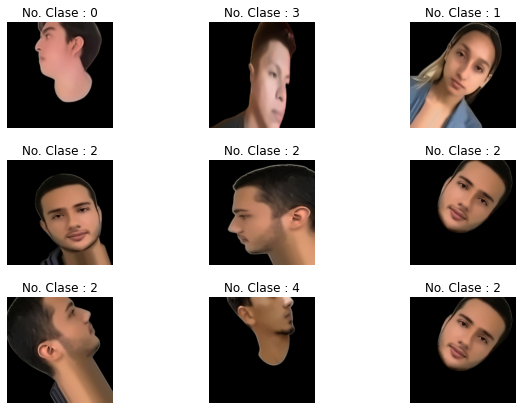

In [13]:
def mostrar_imagenes_aleatorias(imagenes, etiquetas):
    """Permite imprimir randómicamente una imagen por cada clase con título y sus dimensiones.

    Argumentos:
        ruta_imagenes (str): Una cadena de texto que identifica el.

    Returna:
        No retorna nada
    """
    '''Se establece las dimensiones de contendor del gráfico'''  
    plt.figure(1 , figsize = (10 , 7))
    '''Se establece una variable contador'''
    n = 0 
    '''Se genera un ciclo que iterará cada imagen'''
    for iterador in range(9):
        '''Se aumentan en una uniadad del contador'''
        n += 1 
        '''Se genera un número aleatorio'''
        numero_aleatario = np.random.randint(0 , imagenes.shape[0] , 1)
        '''Se establece la distribución del contenedor gráfico'''
        plt.subplot(3 , 3 , n)
        '''Se ajusta la separación de altura y anchura'''
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        '''Se muestra una imagen de forma aletoria'''
        plt.imshow(imagenes[numero_aleatario[0]])
        '''Se genera el título de cada imagen'''
        plt.title('No. Clase : {}'.format(etiquetas[numero_aleatario[0]]))
        '''Se deshabilita la visualización de los ejes'''
        plt.axis('off')
    '''Se muestra el contenedor gráfico'''
    plt.show()
'''Se llama al método generado anteriormente'''
mostrar_imagenes_aleatorias(imagenes, etiquetas)

## Preparando la data para la generación del modelo CNN

In [14]:
'''Barajando los datos'''
'''Primer paso'''
numero_aleatorio = np.arange(imagenes.shape[0])
print("Valores antes de barajear = ",numero_aleatorio)

'''Barajando todos los valores igualmente espaciados en la lista almacenada aleatoriamente'''
np.random.seed(semilla_aleatoria)
np.random.shuffle(numero_aleatorio)
print("\nValores después de barajear = ",numero_aleatorio)

Valores antes de barajear =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137]

Valores después de barajear =  [ 53   8  97  83  78  45  38  55  75  28   3  10  85  20  79  39 127  26
  76   6   2 103  35  47  69 113  31 105  57  73  25 111  43  21  96  90
  94  23  71  84  44  51 112 124  27   7  67 114  14  82 122  36  81  70
  32  17  48 115 107 132  42  41 116  68  61  89  29  66  46  15  34 109
  64  72 101 119  30 104  24   5  87  16 100 118 123  95  52   4 129  50
 131  98  54 

In [15]:
'''Segundo paso'''
'''Barajendo las imágenes y los datos de las etiquetas correspondientes en las dos listas'''
imagenes = imagenes[numero_aleatorio]
etiquetas = etiquetas[numero_aleatorio]

print("Dimensiones de la imagen después de barajear = ",imagenes.shape,"\nDimensiones de " +
    "las etiquetas después de barajear = ",etiquetas.shape)

Dimensiones de la imagen después de barajear =  (138, 192, 192, 3) 
Dimensiones de las etiquetas después de barajear =  (138,)


In [16]:
'''Se modifica el tipo de dato para imágenes y etiquetas'''
imagenes = imagenes.astype(np.float32)
etiquetas = etiquetas.astype(np.int32)
imagenes = imagenes/255
print("Dimensión de las imágenes después de normalizar= ",imagenes.shape)

Dimensión de las imágenes después de normalizar=  (138, 192, 192, 3)


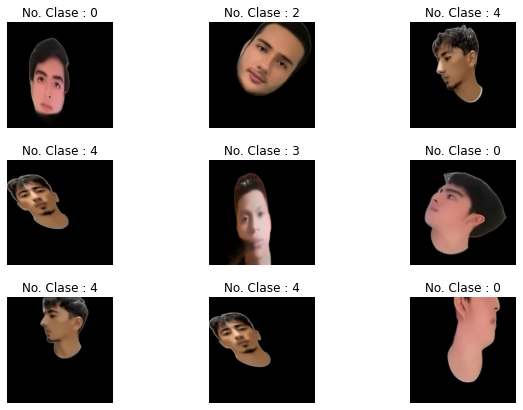

In [18]:
'''Se llama al método que imprime imágenes aleatorias'''
mostrar_imagenes_aleatorias(imagenes, etiquetas)

## Se divide el dataset en entrenamiento y prueba

In [28]:
'''Se divide el dataset en entrenamiento y prueba (20%)'''
train_fotos, test_fotos, train_etiquetas, test_etiquetas = train_test_split(imagenes, etiquetas,
                                                                 test_size = 0.2, random_state = semilla_aleatoria)

'''Se imprime las dimensiones para cada división realizada'''
print("Dimensión train_fotos = ",train_fotos.shape)
print("Dimensión train_etiquetas= ",train_etiquetas.shape)
print("\nDimensión test_fotos = ",test_fotos.shape)
print("Dimensión test_etiquetas = ",test_etiquetas.shape)

Dimensión train_fotos =  (110, 192, 192, 3)
Dimensión train_etiquetas=  (110,)

Dimensión test_fotos =  (28, 192, 192, 3)
Dimensión test_etiquetas =  (28,)


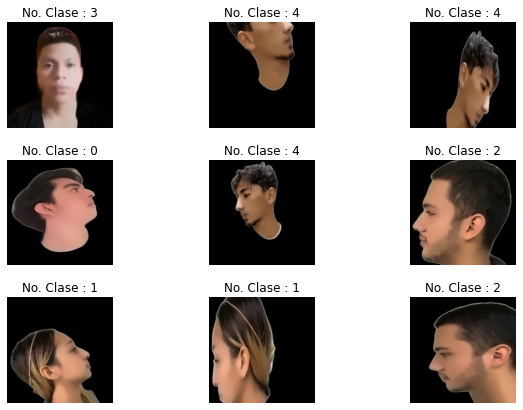

In [29]:
'''Se llama al método que imprime imágenes aleatorias'''
mostrar_imagenes_aleatorias(train_fotos, train_etiquetas)

# Arquitectura de AlexNet

## Primer experimento

In [30]:
'''Se cambia el tamaño de las fotos para entrenamiento y prueba'''
train_fotos = tf.image.resize(train_fotos, (227, 227))
test_fotos = tf.image.resize(test_fotos, (227, 227))

In [33]:
'''Se genera un modelo secuencial'''
modelo = Sequential()
'''Se añade la primera capa de convulución'''
modelo.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))
'''Se añade la primera capa de maxpool'''
modelo.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
modelo.add(BatchNormalization())
'''Se añade la segunda capa de convulución'''
modelo.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))
'''Se añade la segunda capa de maxpool'''
modelo.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
modelo.add(BatchNormalization())
'''Se añade la tercera capa de convulución'''
modelo.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
'''Se añade la cuarta capa de convulución'''
modelo.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
'''Se añade la quinta capa de convulución'''
modelo.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
'''Se añade la tercera capa de maxpool'''
modelo.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
modelo.add(BatchNormalization())
modelo.add(Flatten())
'''1 capa de densidad'''
modelo.add(Dense(4096,input_shape=(227,227,3),activation="relu"))
modelo.add(Dropout(0.4))
modelo.add(BatchNormalization())
'''2 capa de densidad'''
modelo.add(Dense(4096,activation="relu"))
modelo.add(Dropout(0.4))
modelo.add(BatchNormalization())
'''3 capa de densidad'''
modelo.add(Dense(1000,activation="relu"))
modelo.add(Dropout(0.4))
modelo.add(BatchNormalization())
'''Salida'''
modelo.add(Dense(5,activation="softmax"))
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_18 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 11, 11, 256)      0         
 g2D)                                                            
                                                      

In [34]:
'''Se compila el modelo'''
modelo.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Entrenar el modelo

In [35]:
'''Se entra al modelo'''
modelo.fit(train_fotos, train_etiquetas, epochs=100)

Epoch 1/100
4/4 [==============================] - 15s 2s/step - loss: 1.9896 - accuracy: 0.3273
Epoch 2/100
4/4 [==============================] - 7s 2s/step - loss: 1.4918 - accuracy: 0.5364
Epoch 3/100
4/4 [==============================] - 7s 2s/step - loss: 1.0729 - accuracy: 0.7091
Epoch 4/100
4/4 [==============================] - 7s 2s/step - loss: 0.8150 - accuracy: 0.7273
Epoch 5/100
4/4 [==============================] - 7s 2s/step - loss: 0.9791 - accuracy: 0.7000
Epoch 6/100
4/4 [==============================] - 7s 2s/step - loss: 0.6579 - accuracy: 0.7364
Epoch 7/100
4/4 [==============================] - 7s 2s/step - loss: 0.6623 - accuracy: 0.7909
Epoch 8/100
4/4 [==============================] - 7s 2s/step - loss: 0.4929 - accuracy: 0.8000
Epoch 9/100
4/4 [==============================] - 7s 2s/step - loss: 0.4750 - accuracy: 0.8091
Epoch 10/100
4/4 [==============================] - 7s 2s/step - loss: 0.3475 - accuracy: 0.8455
Epoch 11/100
4/4 [====================

In [38]:
'''Se evalúa la exactitud del  modelo'''
perdida, exactitud_primero = modelo.evaluate(test_fotos, test_etiquetas)

print(perdida,exactitud_primero)

1/1 [==============================] - 1s 1s/step - loss: 9.2343 - accuracy: 0.3929
9.234262466430664 0.3928571343421936


### Predecir valores con el modelo entrenado

In [42]:
'''Se establece la predicción del modelo'''
pred = modelo.predict(test_fotos)
pred.shape

1/1 [==============================] - 1s 900ms/step


(28, 5)

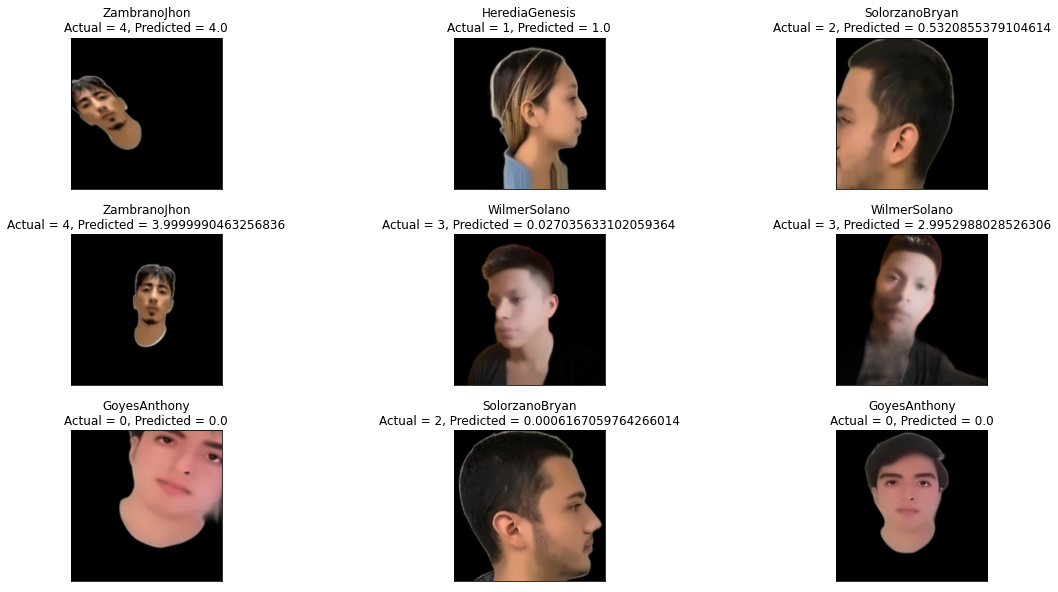

In [50]:
'''Se iprimn nueve imagenes de forma aleatoria'''
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, test_fotos.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(test_fotos[r[0]])
    plt.title(nombre_clases[test_etiquetas[r[0]]]+'\nActual = {}, Predicted = {}'.format(test_etiquetas[r[0]] ,
             test_etiquetas[r[0]]*pred[r[0]][test_etiquetas[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()